# Cleaned Dataset

Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [1]:
import sanity_checks_methods
import ML_algorithms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

In [2]:
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22760,0.0,34.0,0,0,1,3,0,83.57,24.5,0,0
35865,0.0,48.0,1,0,1,2,1,69.94,33.3,1,0
24608,1.0,58.0,0,0,1,4,0,69.24,26.6,0,0
26877,1.0,25.0,0,0,0,2,1,160.76,30.2,1,0
29623,1.0,51.0,0,0,0,4,1,80.55,23.5,1,0
29557,0.0,90.0,0,0,1,4,0,207.84,38.9,0,0
38083,1.0,47.0,1,0,1,3,1,107.21,27.0,1,0
24646,1.0,69.0,0,1,1,4,1,208.05,35.3,1,0
30964,1.0,21.0,1,0,0,4,1,71.22,40.0,0,0
33339,0.0,25.0,0,0,1,2,0,97.40,44.6,1,0


In [3]:
num_features = df.shape[1]
num_data_points = df.shape[0]

print("Number of features in the dataset: ", num_features)
print("Number of data in dataset: ", num_data_points)

Number of features in the dataset:  11
Number of data in dataset:  10000


## Sanity checks

In [4]:
sanity_checks_methods.max_min_commonValue(df)

SEX
min value:0.0
max value: 1.0
max common value: 1.0

AGE
min value:-5.0
max value: 101.0
max common value: 60.0

HYPERTENSION
min value:0
max value: 1
max common value: 0

HEART_DISEASE
min value:0
max value: 1
max common value: 0

EVER_MARRIED
min value:0
max value: 1
max common value: 1

WORK_TYPE
min value:0
max value: 4
max common value: 4

RESIDENCE_TYPE
min value:0
max value: 1
max common value: 1

AVG_GLUCOSE_LEVEL
min value:55.12
max value: 271.74
max common value: 94.39

BMI
min value:14.1
max value: 78.0
max common value: 31.4

SMOKING_STATUS
min value:0
max value: 1
max common value: 0

STROKE
min value:0
max value: 1
max common value: 0



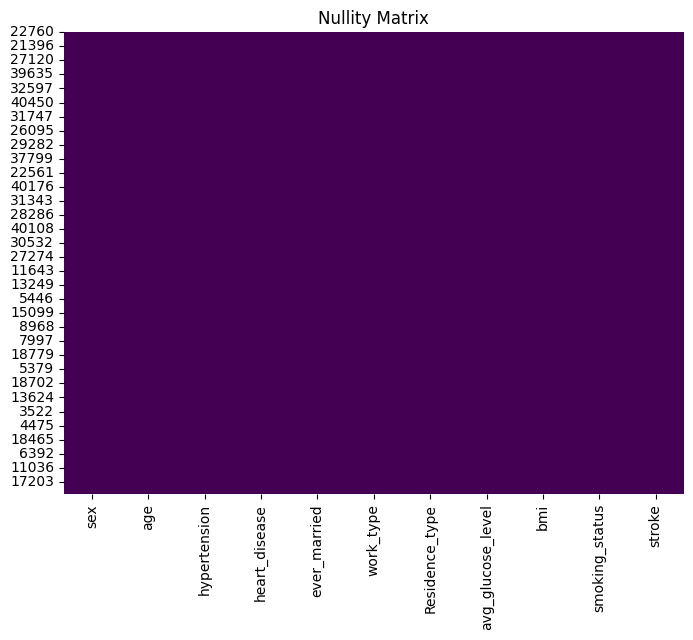

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Nullity Matrix')
plt.show()

#### Dropping null values

Print null and duplicates values before removing them. After show operation results

In [6]:
# Print sum of null values for each feature
sanity_checks_methods.print_null_duplicates_values(df)

total rows: 10000
Null Value Counts:
sex                  1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.01
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.00
smoking_status       0.00
stroke               0.00
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 1
Null Percentage: 0.01%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Co

**Dropping null values**

In [7]:
df = sanity_checks_methods.drop_null_values(df)

In [8]:
sanity_checks_methods.print_null_duplicates_values(df)
df = sanity_checks_methods.drop_null_values(df)
df.drop_duplicates(inplace=True)
sanity_checks_methods.print_null_duplicates_values(df)

total rows: 9999
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Count: 0
Null 

#### Dropping outliers 

no outliers detected
no outliers detected


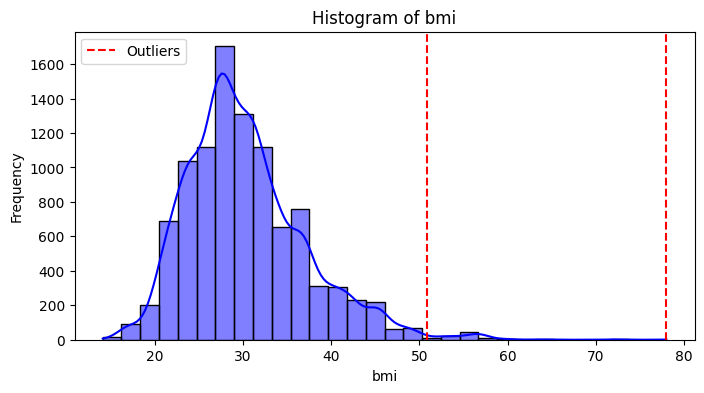

In [9]:
sanity_checks_methods.visualize_outliers(df)

no outliers detected
no outliers detected


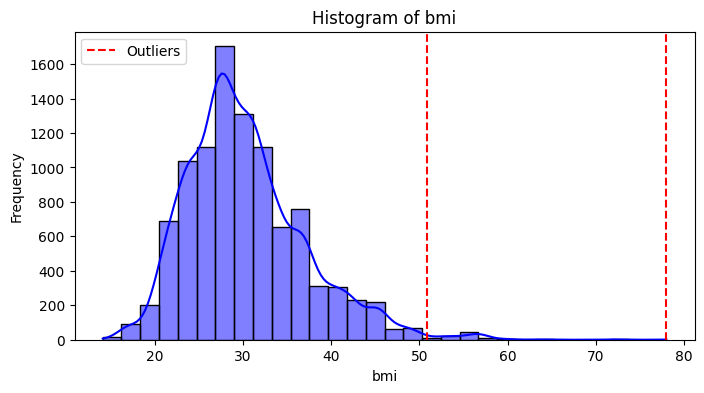

no outliers detected
no outliers detected
no outliers detected


In [10]:
sanity_checks_methods.visualize_outliers(df)
df = sanity_checks_methods.drop_outliers(df)
sanity_checks_methods.visualize_outliers(df)

#### Dropping negative values for features BMI, age and avg_glucose_level

In [11]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)
    
for feature in numerical_features:  
    df = sanity_checks_methods.drop_negative_values(df, feature)
    
for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

abnormal values present in age feature
       sex  age  hypertension  heart_disease  ever_married  work_type  \
13764  0.0 -1.0             0              0             1          4   
10175  1.0 -2.0             1              0             1          3   
11840  0.0 -2.0             1              0             1          3   
14940  0.0 -2.0             0              0             0          4   
9808   1.0 -3.0             0              1             1          3   
9936   1.0 -1.0             1              0             1          4   
13788  0.0 -1.0             1              0             1          4   
11716  1.0 -5.0             0              0             0          4   
10549  1.0 -4.0             1              0             1          4   
12639  0.0 -2.0             0              0             1          4   
11952  1.0 -3.0             1              0             0          3   
14844  0.0 -3.0             0              1             1          2   
10826  1.0 -

In [12]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    df_cleaned = sanity_checks_methods.drop_negative_values(df, feature)
    sanity_checks_methods.check_negative_values(df_cleaned, feature)

correct values in age feature
correct values in avg_glucose_level feature
correct values in bmi feature


#### Dropping invalid age 

##### Dropping invalid age married

In [13]:
sanity_checks_methods.check_age_married_consistency(df)

number of incosistencies: 

404


In [14]:

df = sanity_checks_methods.drop_inconsistencies(df)

## EDA ON ORIGINAL DATASET

### Categorical features frequencies

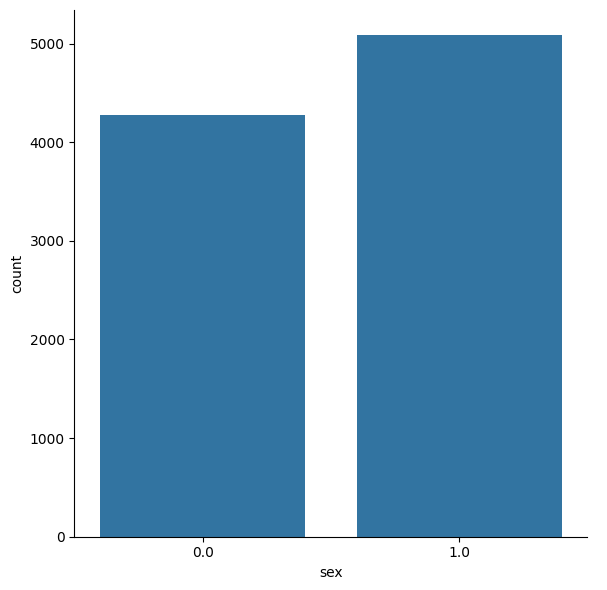

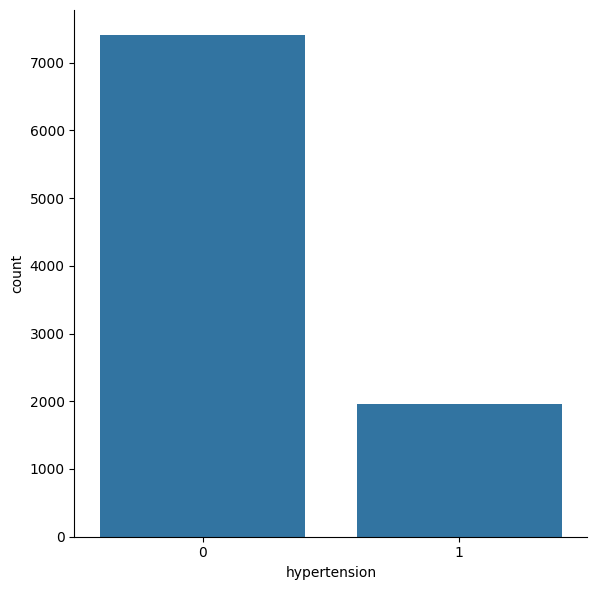

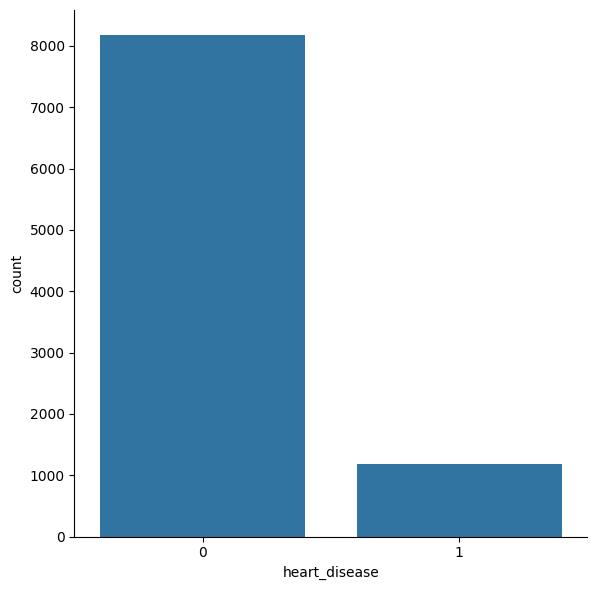

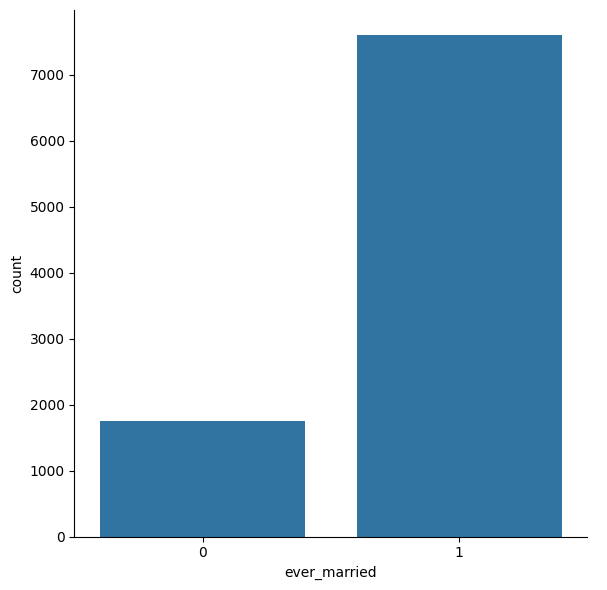

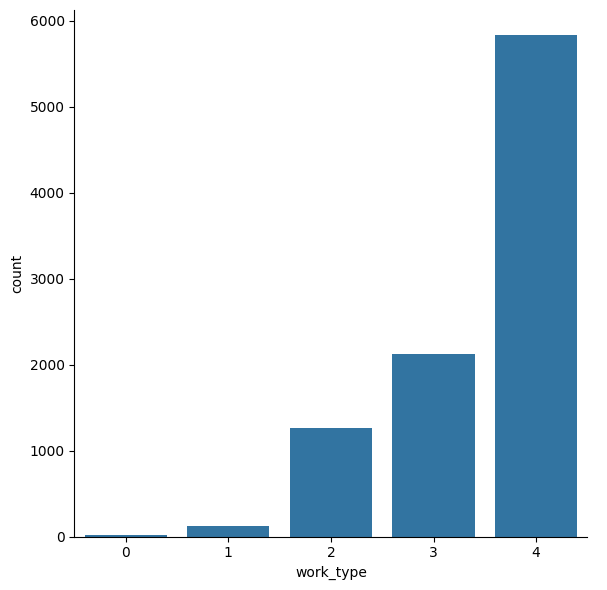

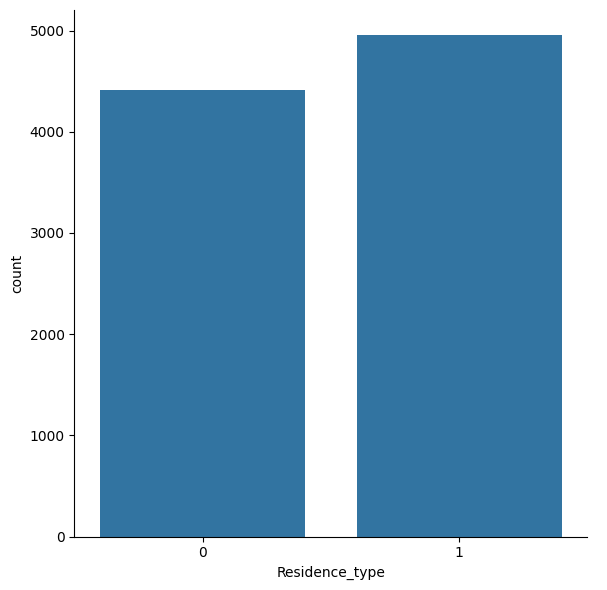

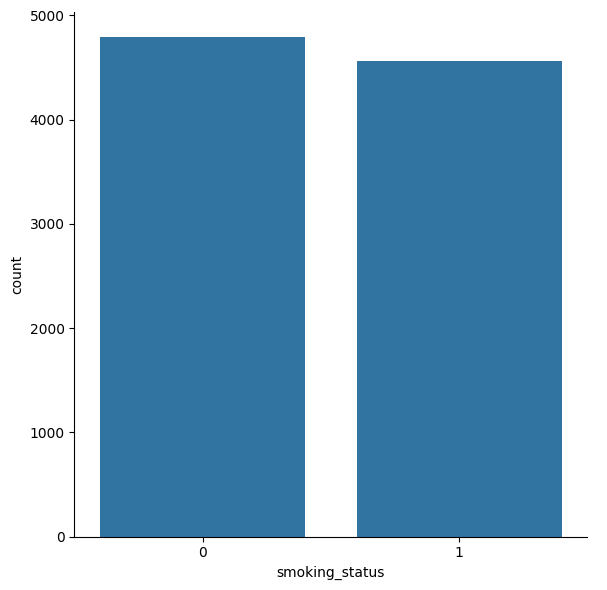

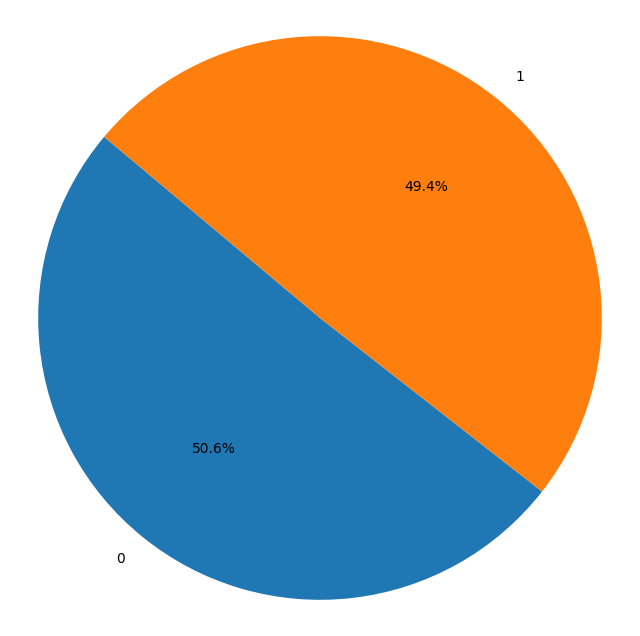

In [15]:
categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()

### Numerical features distribution

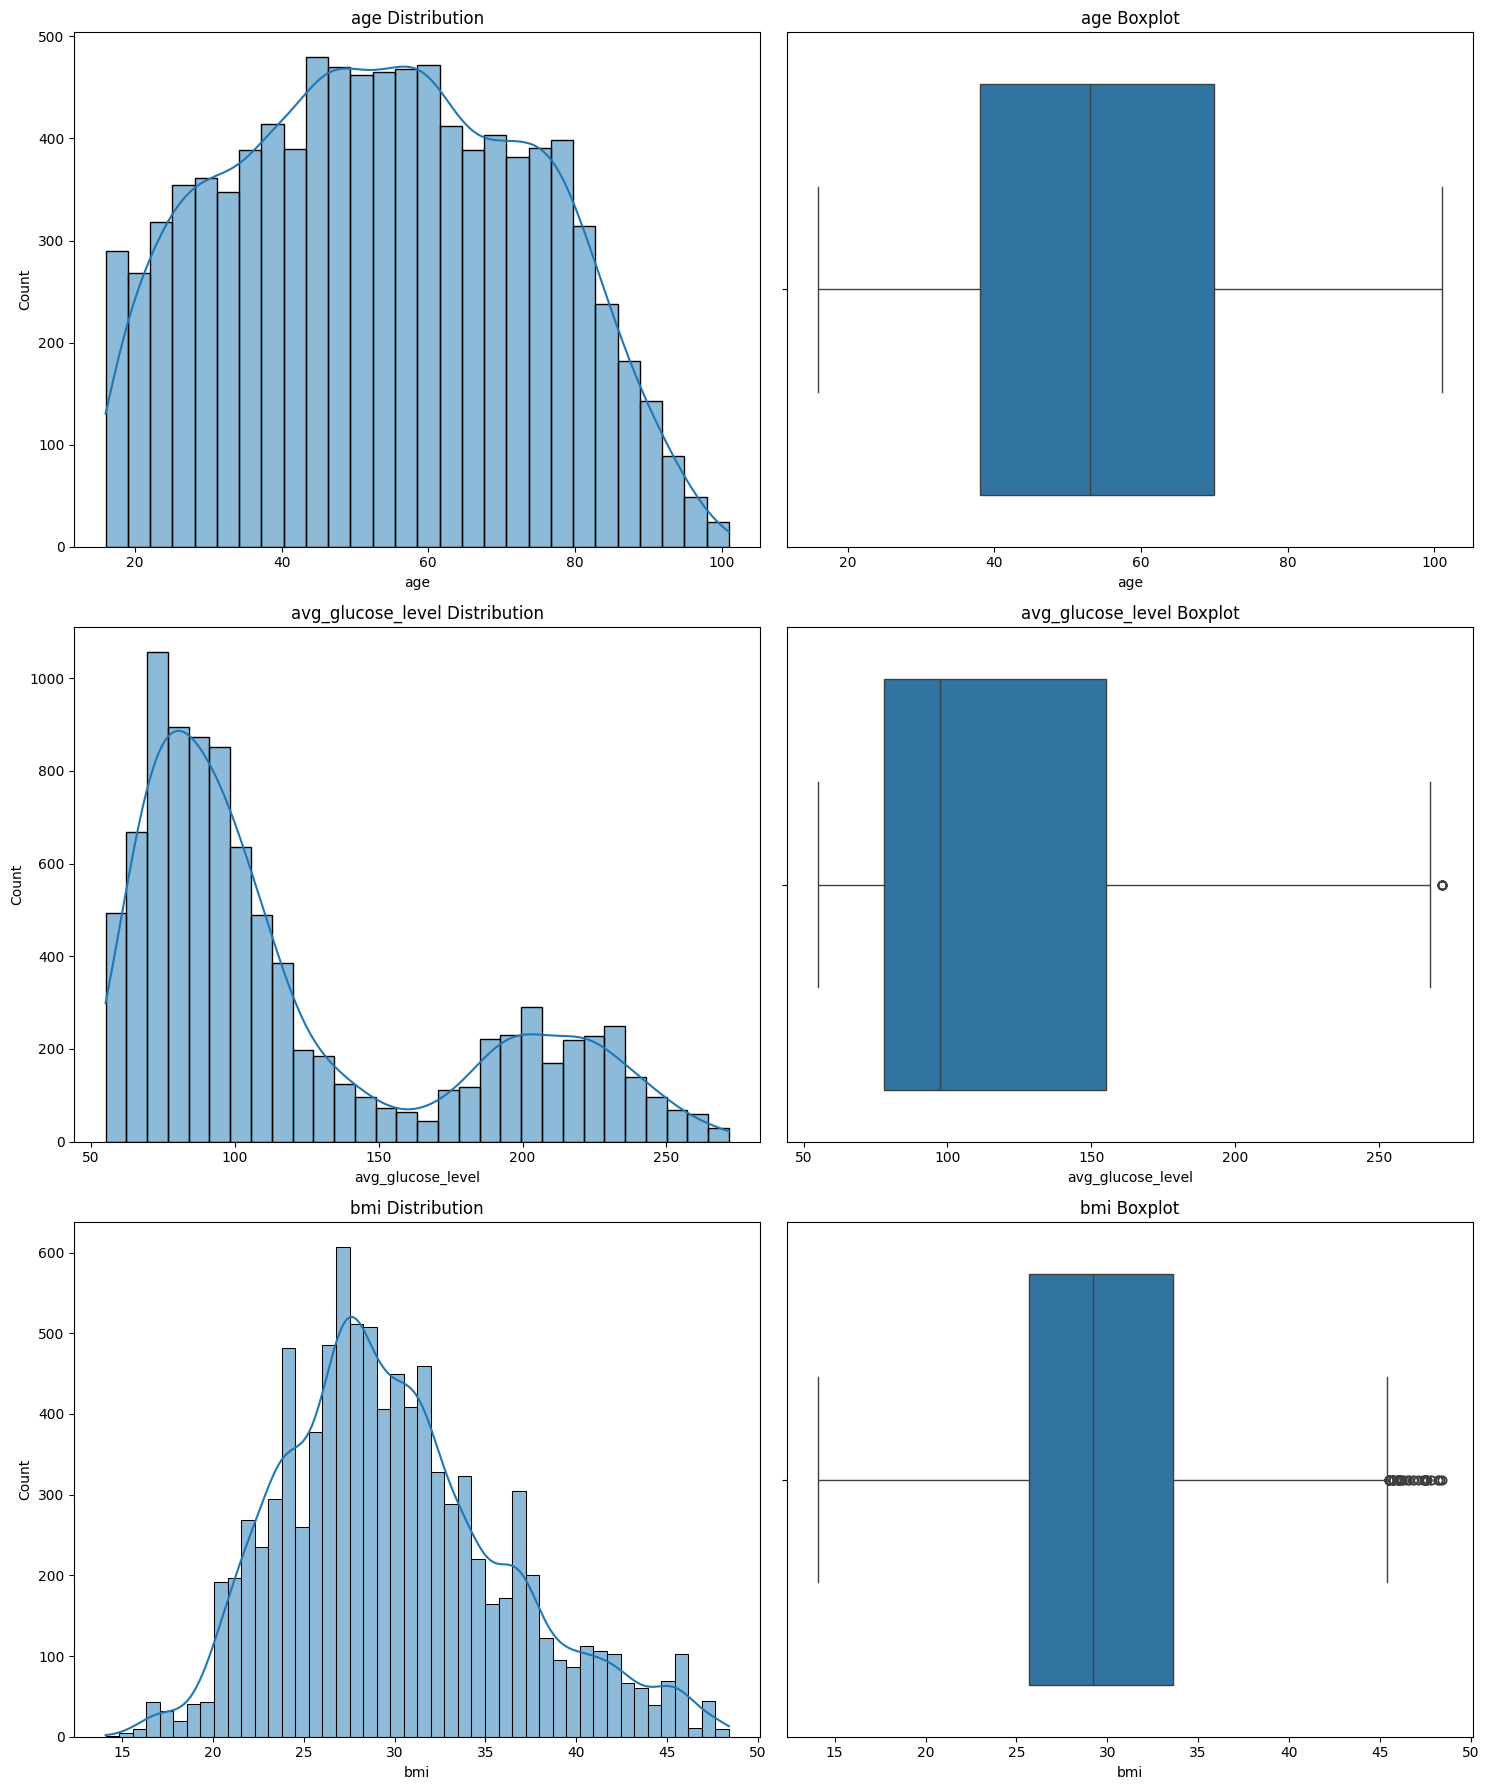

In [16]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


**Correlation matrix**

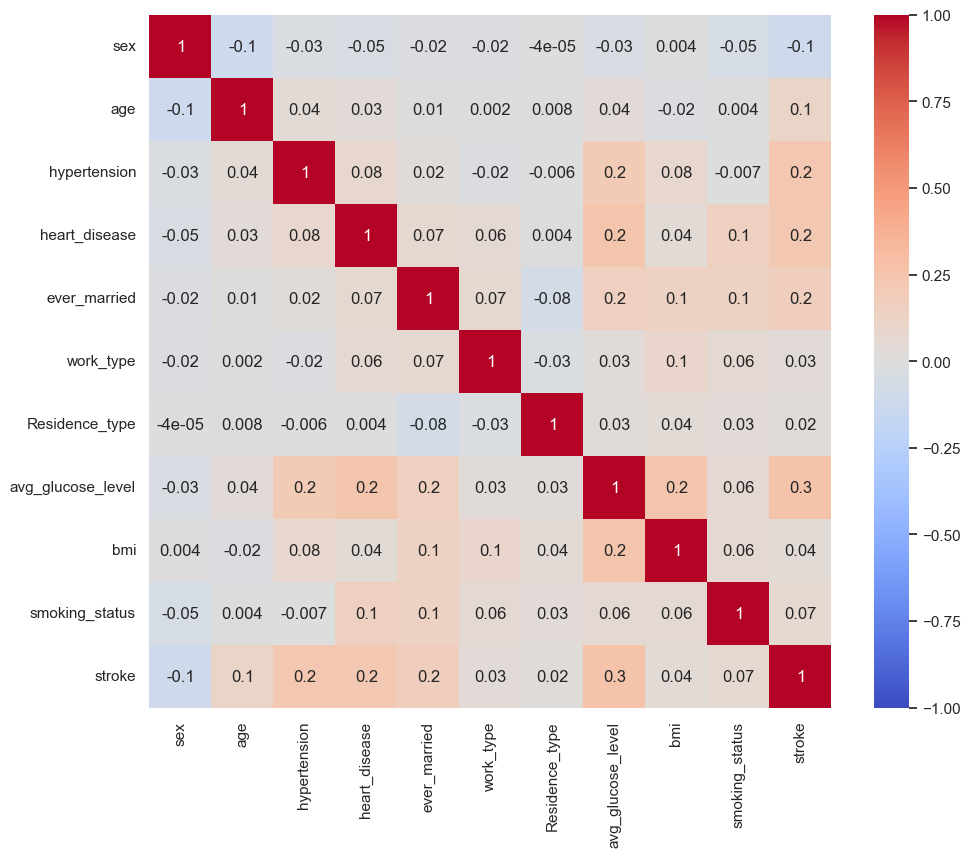

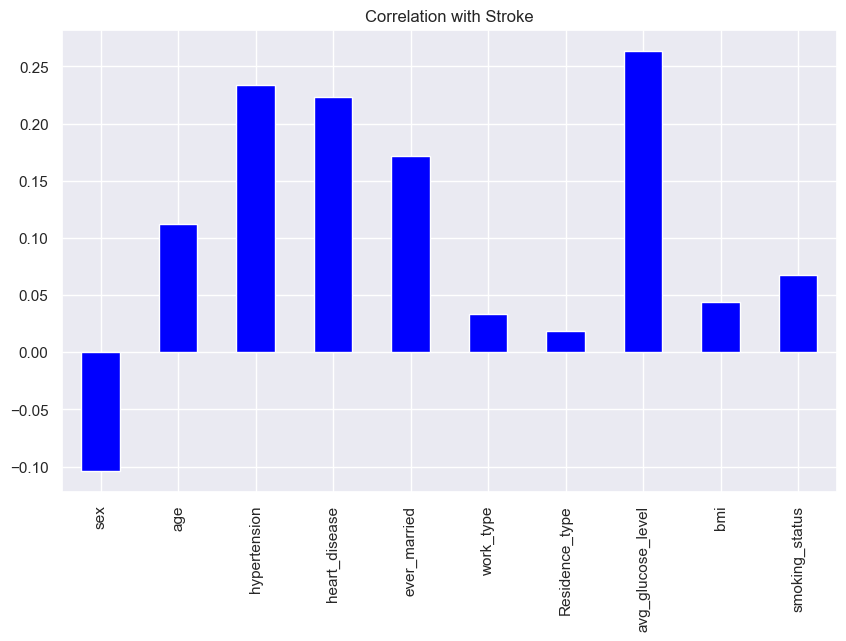

In [17]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

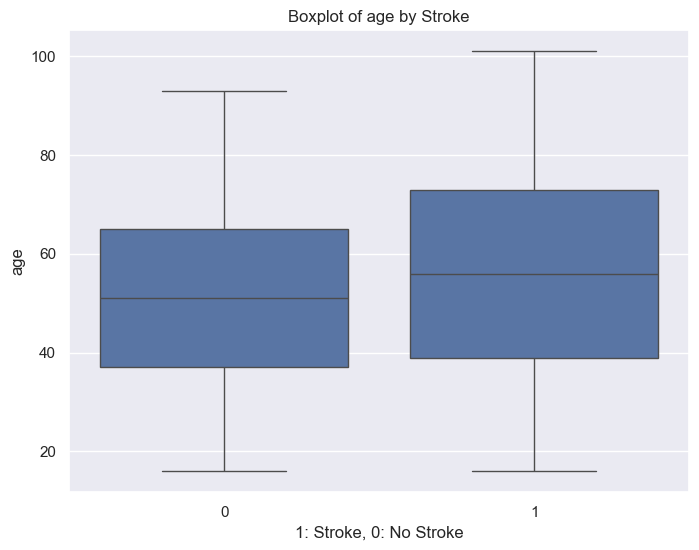

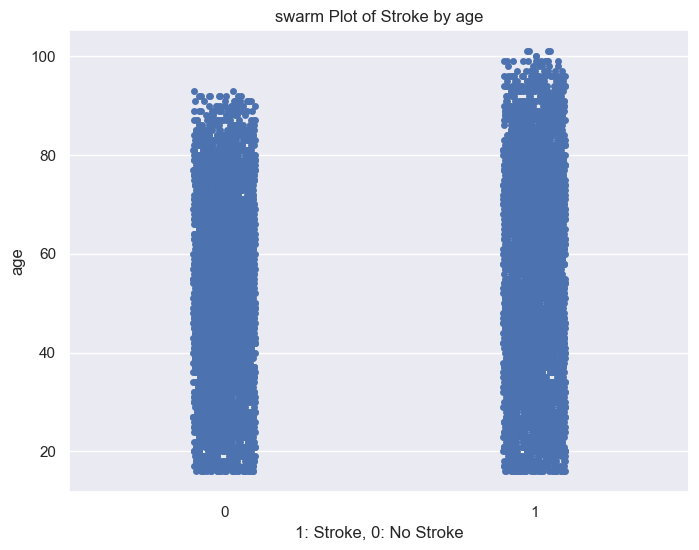

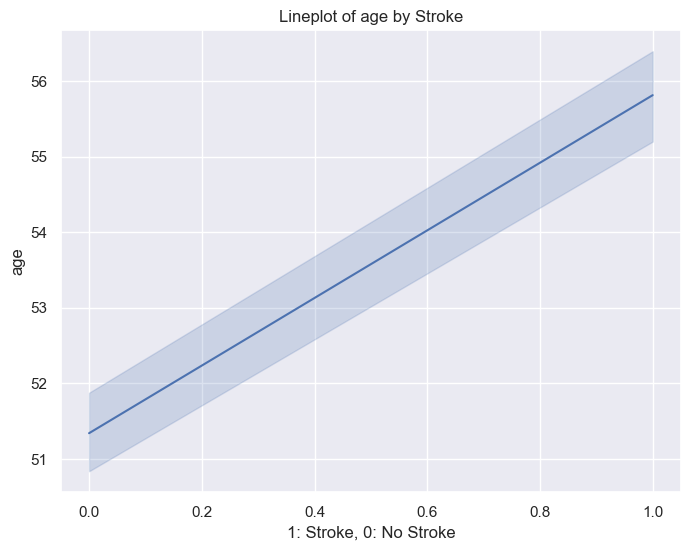

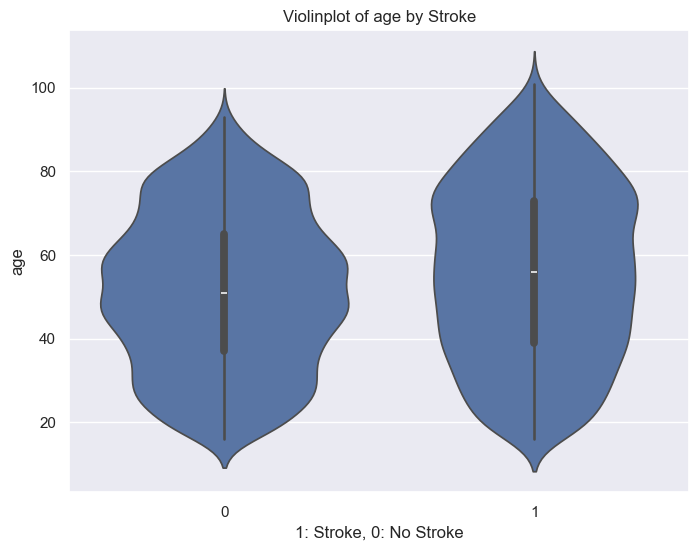

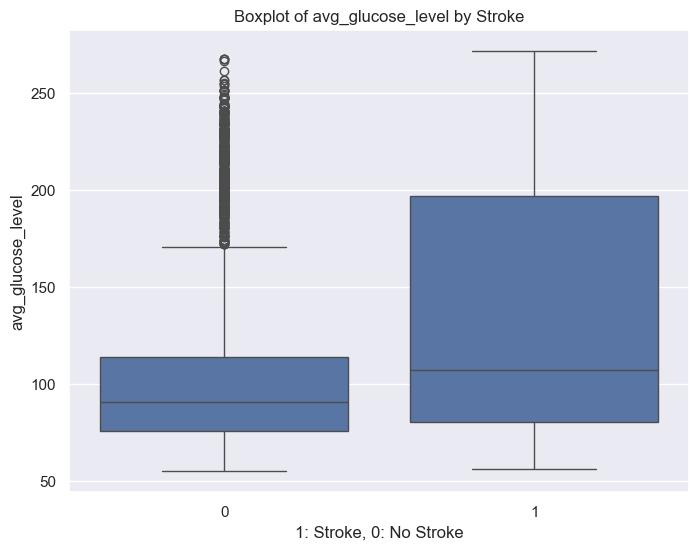

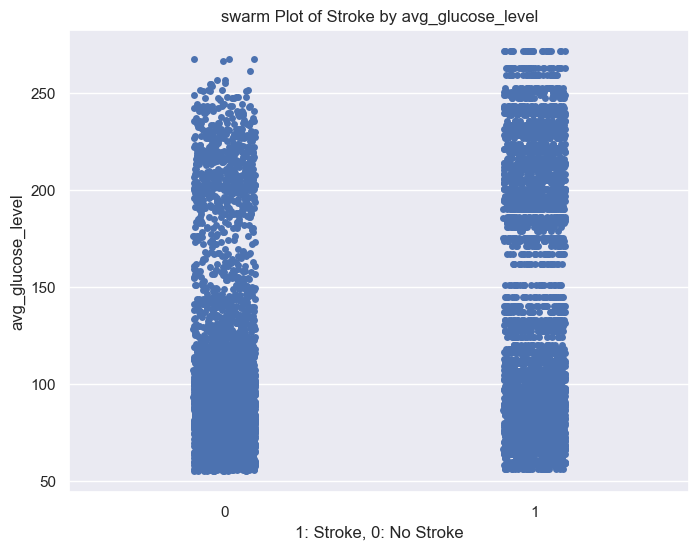

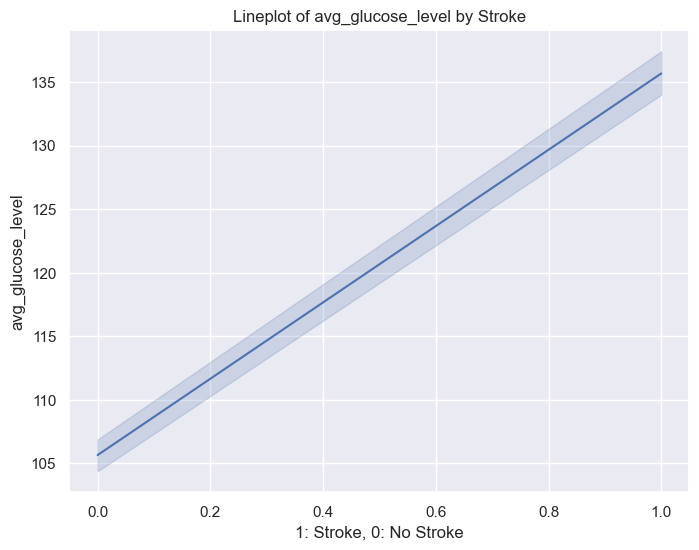

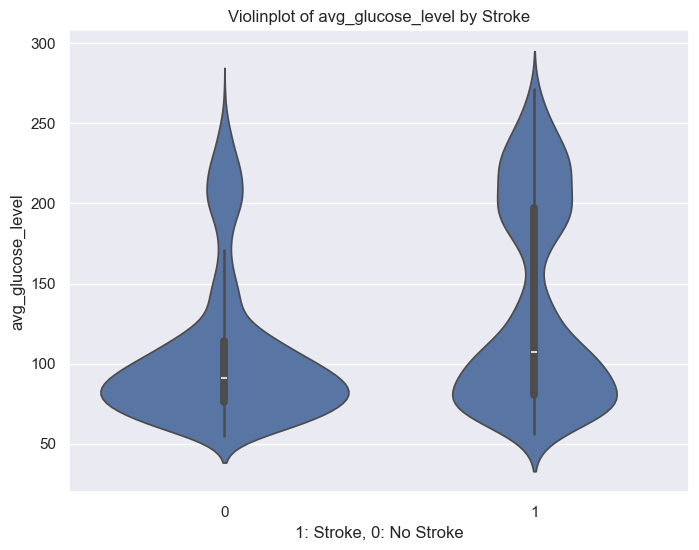

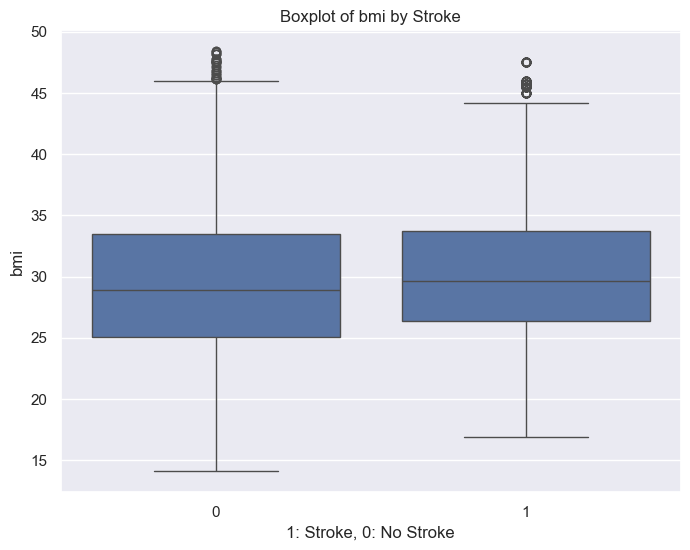

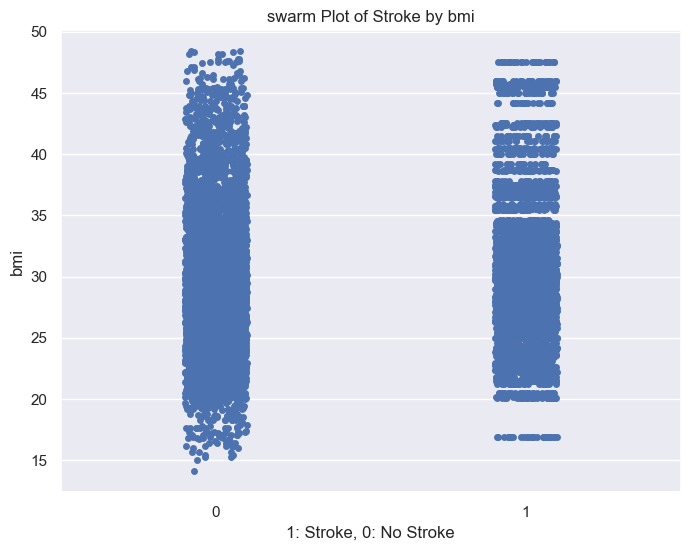

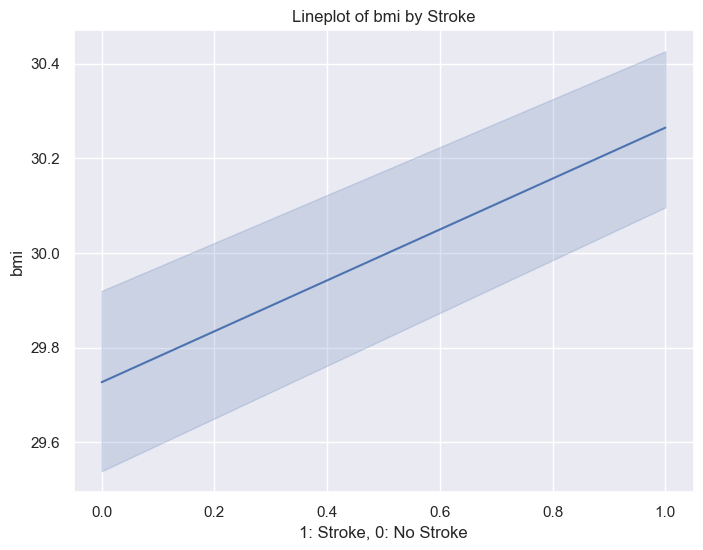

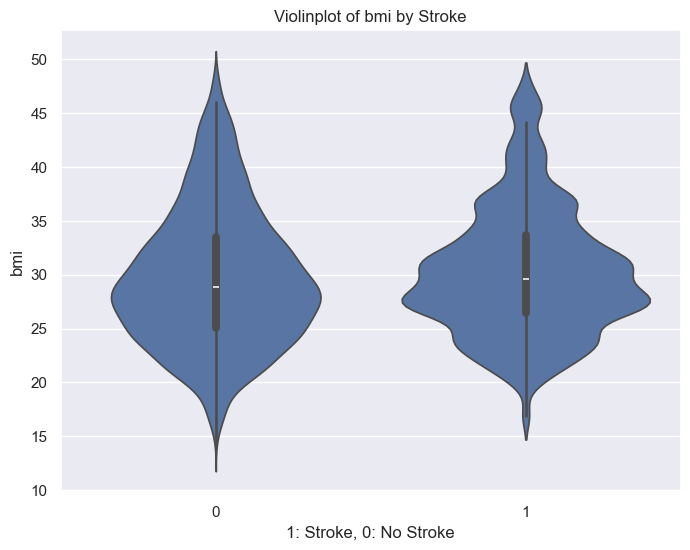

In [18]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target

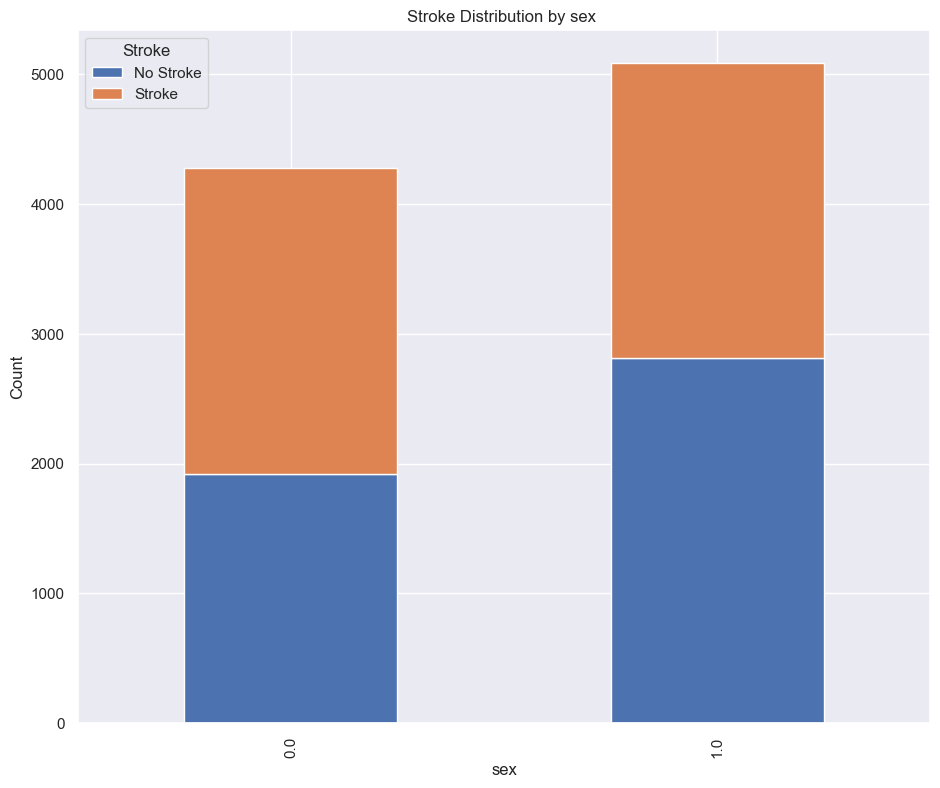

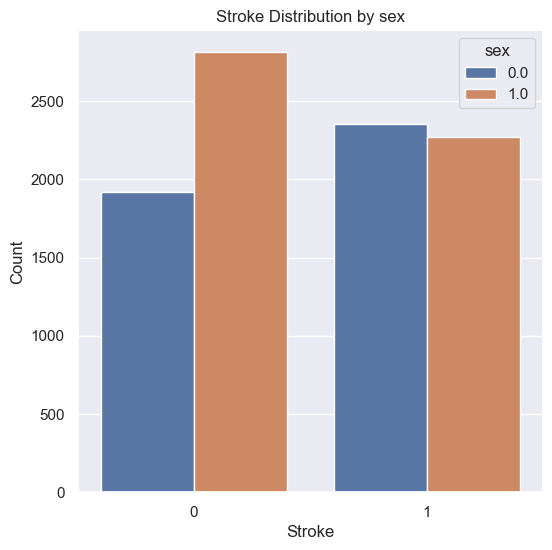

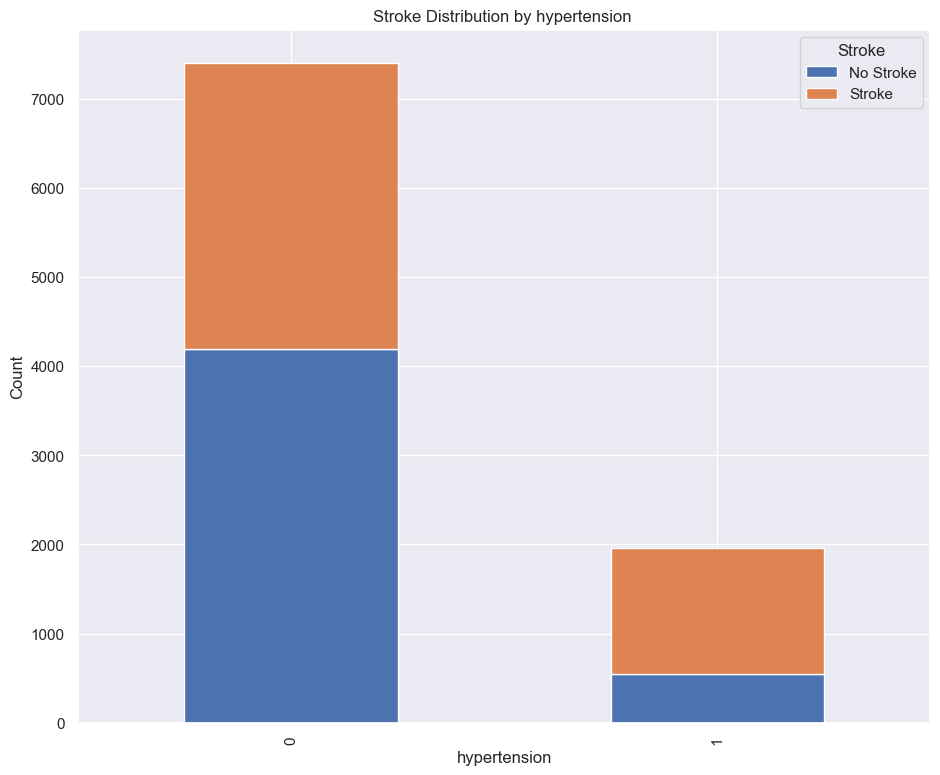

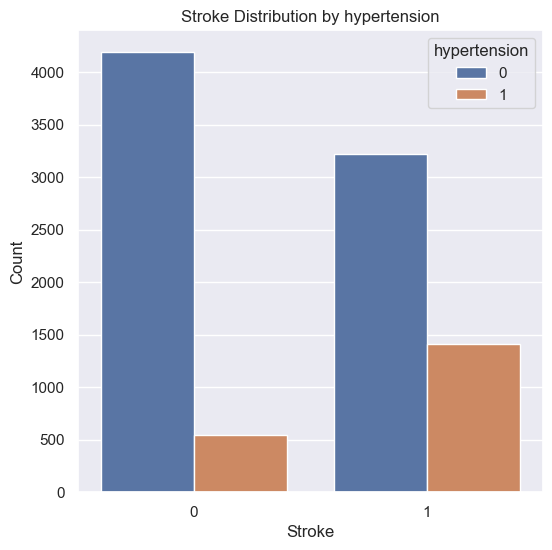

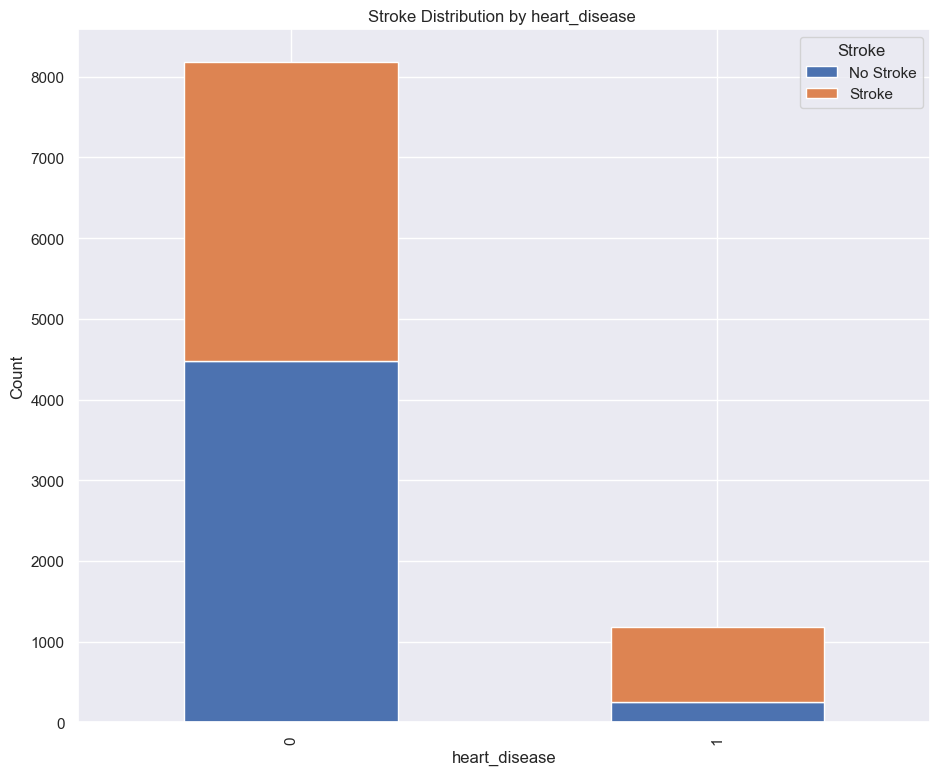

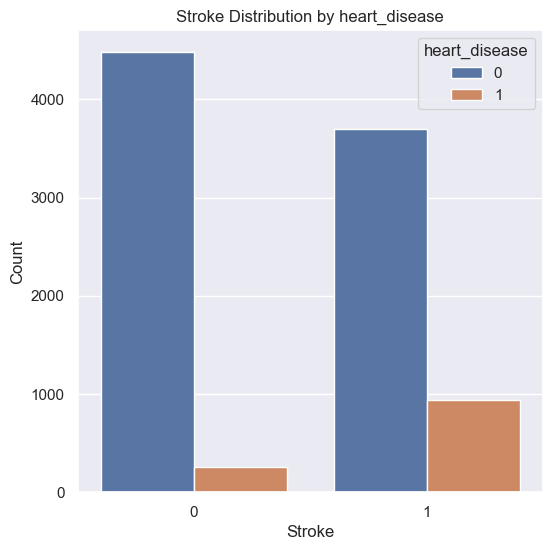

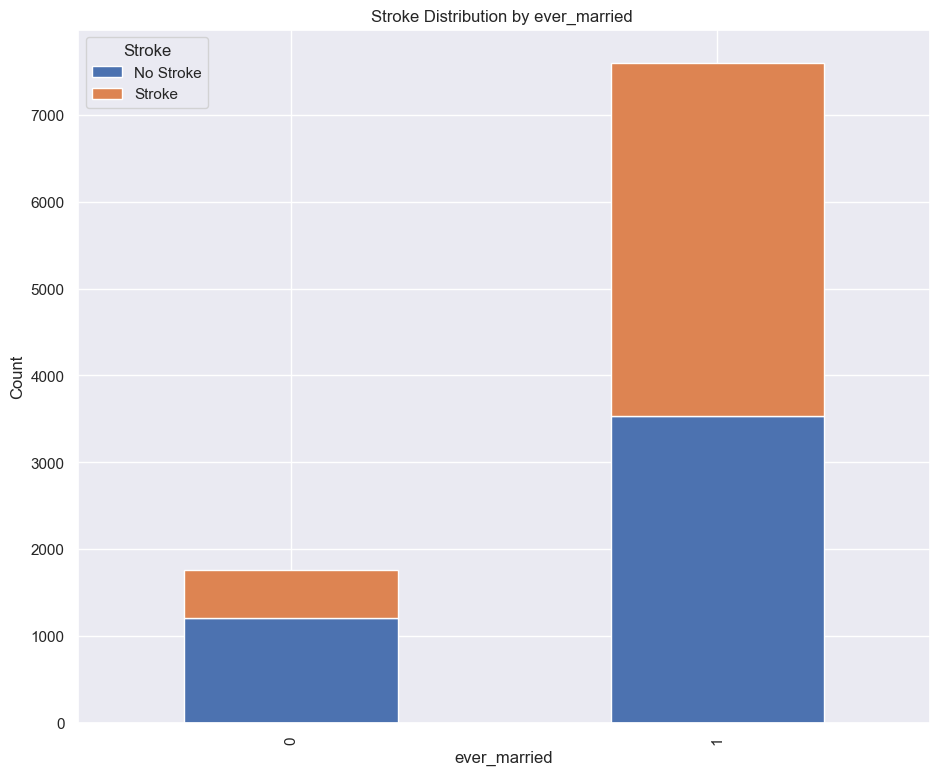

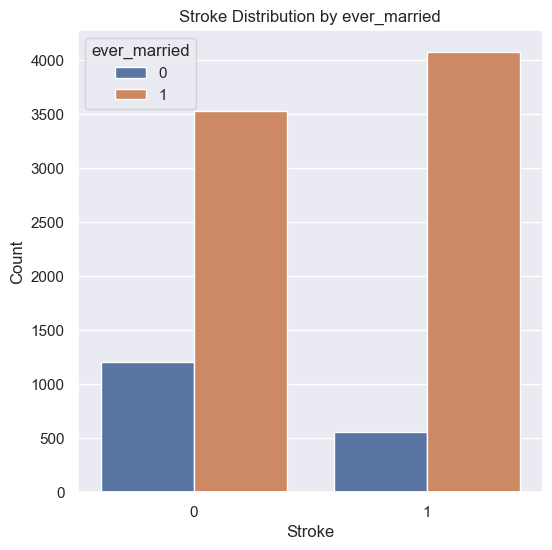

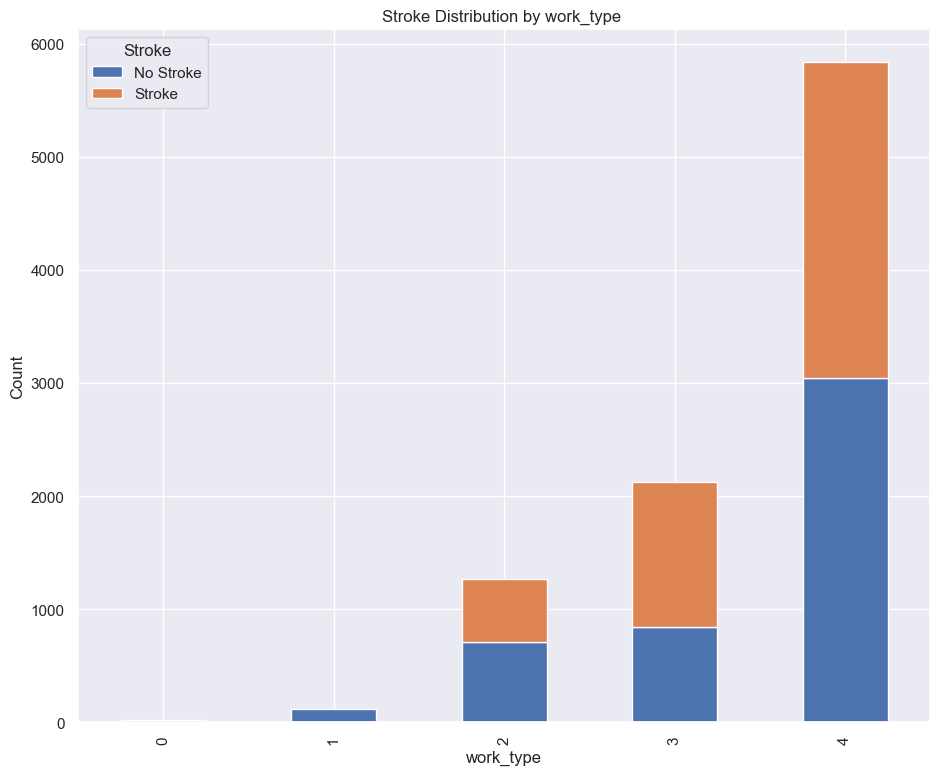

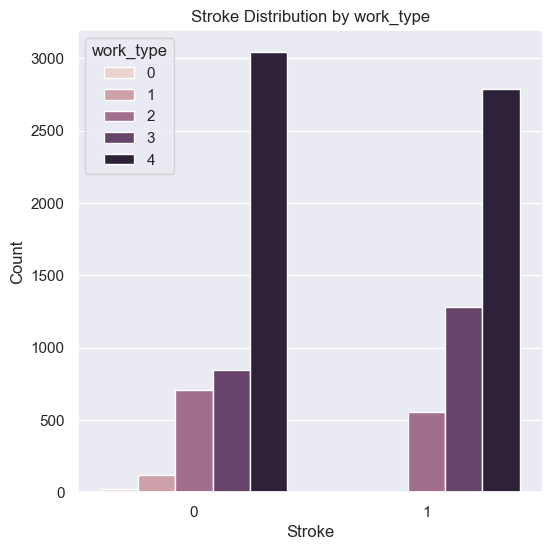

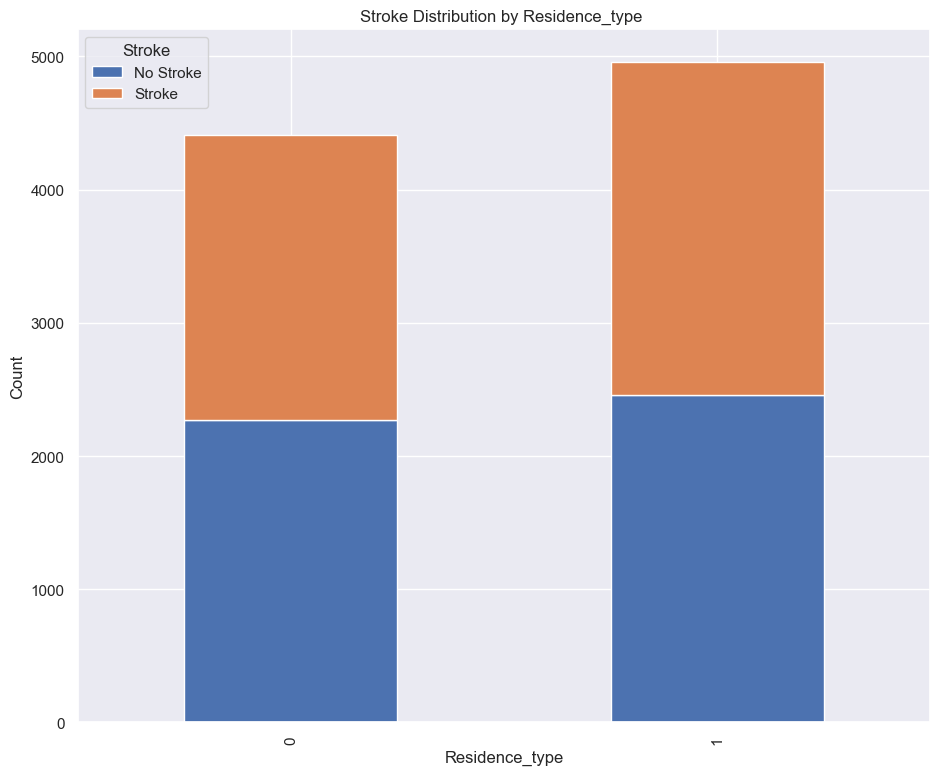

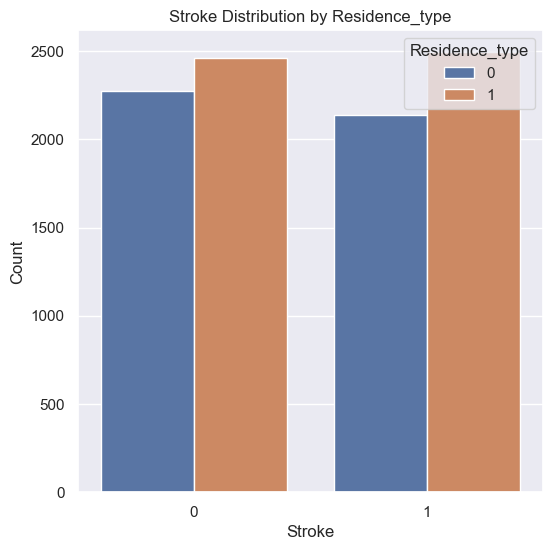

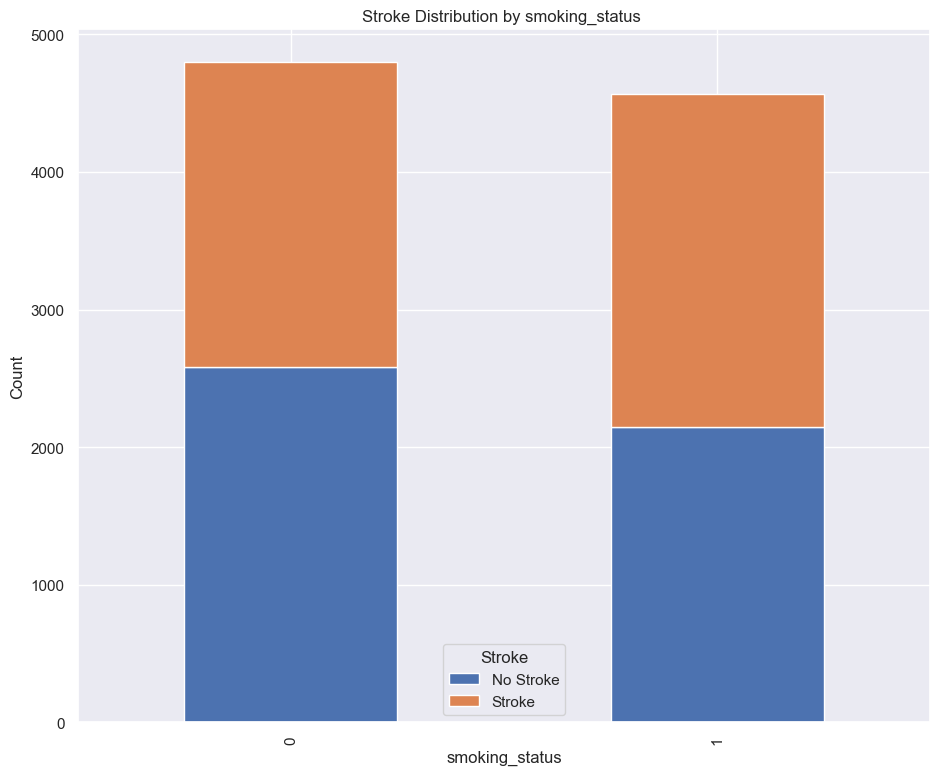

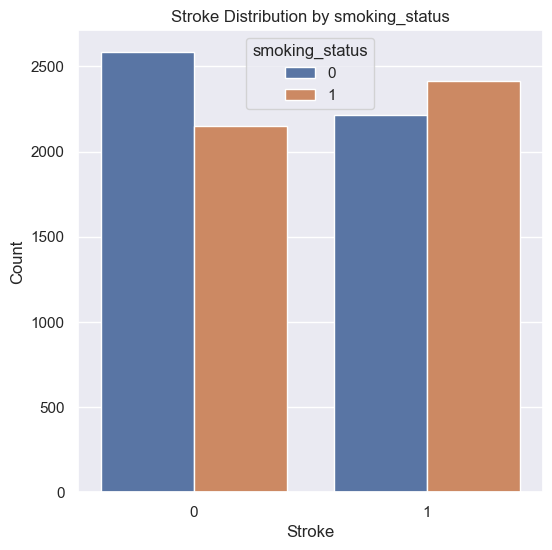

In [19]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def print_stacked_barchart(column):
    grouped = df.groupby([column, 'stroke']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_barchart(column):
    plt.figure(figsize=(6, 6))
    sns.countplot(x='stroke', hue=column, data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()
    
def print_piechart(column):
    plt.figure(figsize=(6, 6))
    sns.pieplot(x=column, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_plots():
    for column in categorical_features:
        print_stacked_barchart(column)
        print_barchart(column)
        ##print_piechart(column)

print_plots()

## Models

### Decision Tree


--- Prestazioni del modello Decision Tree applicato al set di Test: 

Classification Report on Training Set
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3299
           1       0.81      0.93      0.87      3255

    accuracy                           0.86      6554
   macro avg       0.87      0.86      0.86      6554
weighted avg       0.87      0.86      0.86      6554

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1434
           1       0.77      0.95      0.85      1375

    accuracy                           0.84      2809
   macro avg       0.85      0.84      0.84      2809
weighted avg       0.86      0.84      0.84      2809

Node Labels:
 Annotation(0.645002, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


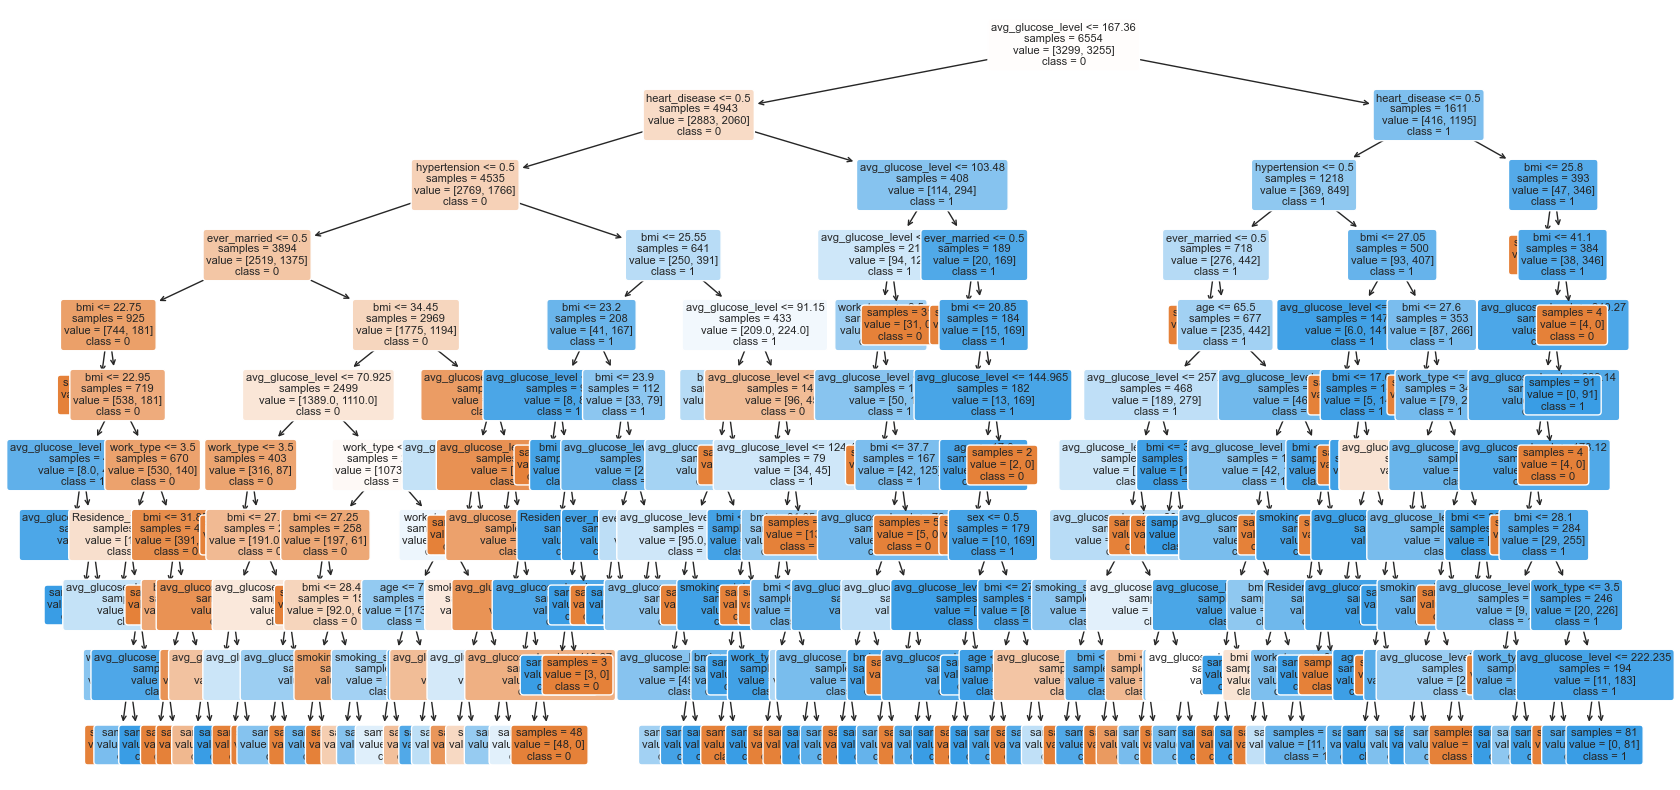

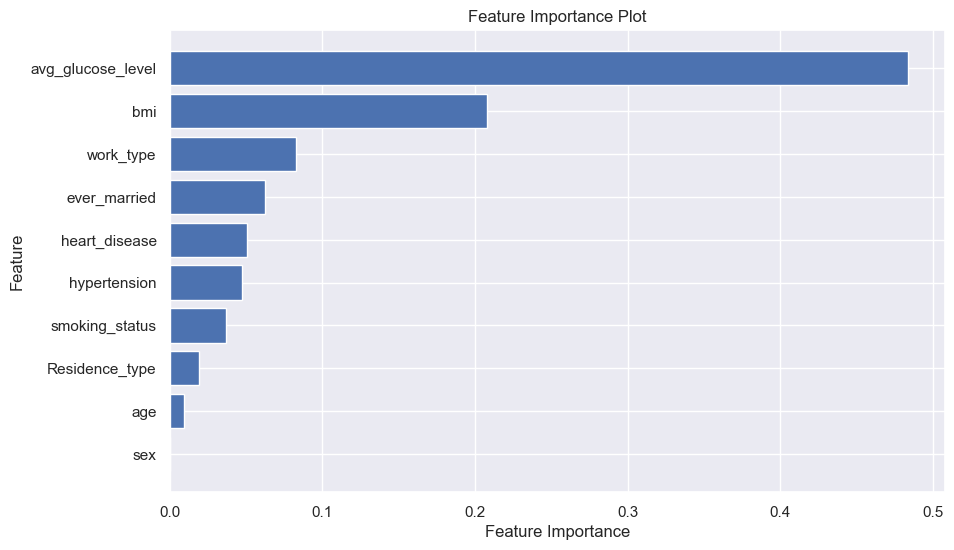

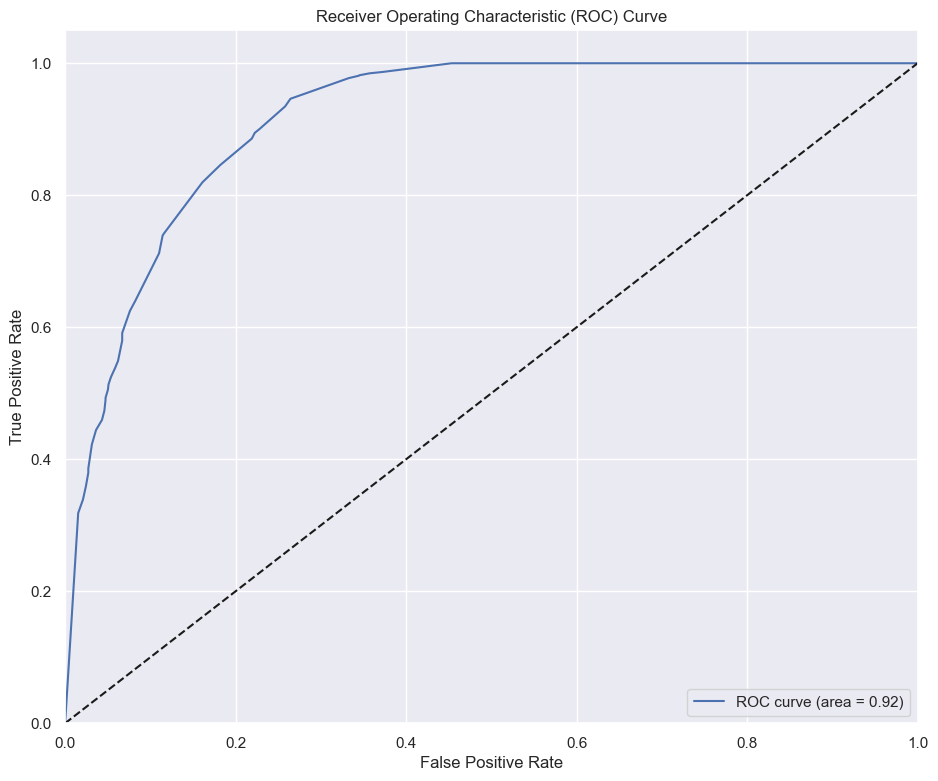

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9165213642703183
Accuracy for each fold: [0.8042704626334519, 0.8327402135231317, 0.8042704626334519, 0.8434163701067615, 0.8398576512455516, 0.7864768683274022, 0.8540925266903915, 0.7935943060498221, 0.8469750889679716, 0.8321428571428572]
Mean accuracy: 0.8237836807320793
95% confidence interval: (0.8063993699148914, 0.8411679915492672)


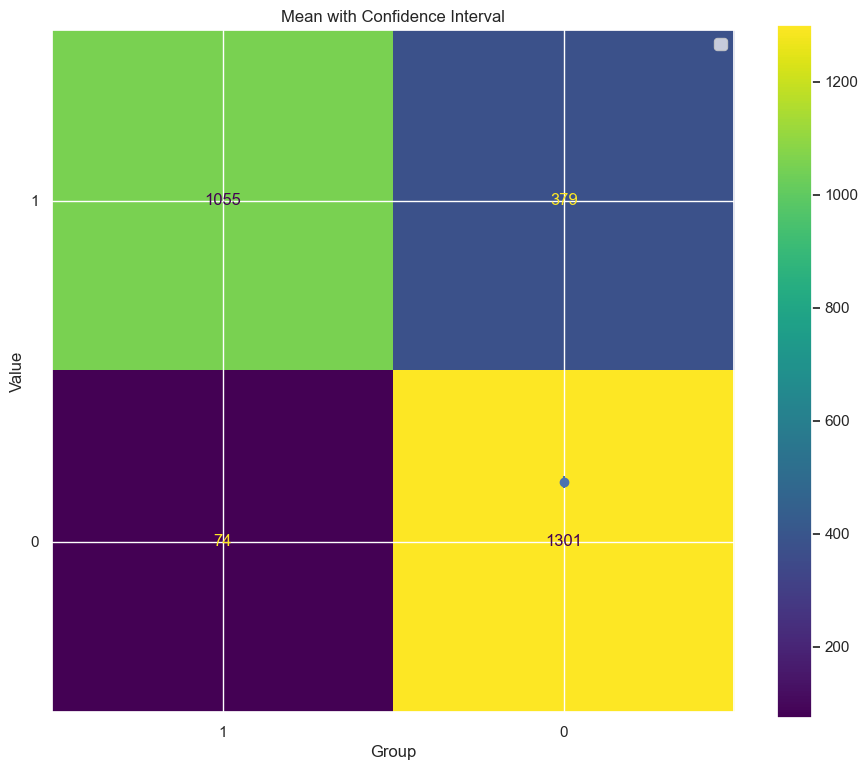

In [20]:
y_pred_prob_dt, y_test_dt, decision_tree = ML_algorithms.decision_tree(df)
mean_accuracy_dt, confidence_interval_dt = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)

### Support Vector Machine

Classification Report Training Set:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      3299
           1       0.73      0.56      0.63      3255

    accuracy                           0.68      6554
   macro avg       0.69      0.68      0.67      6554
weighted avg       0.69      0.68      0.67      6554

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.65      0.79      0.72      1434
           1       0.72      0.55      0.63      1375

    accuracy                           0.68      2809
   macro avg       0.69      0.67      0.67      2809
weighted avg       0.69      0.68      0.67      2809



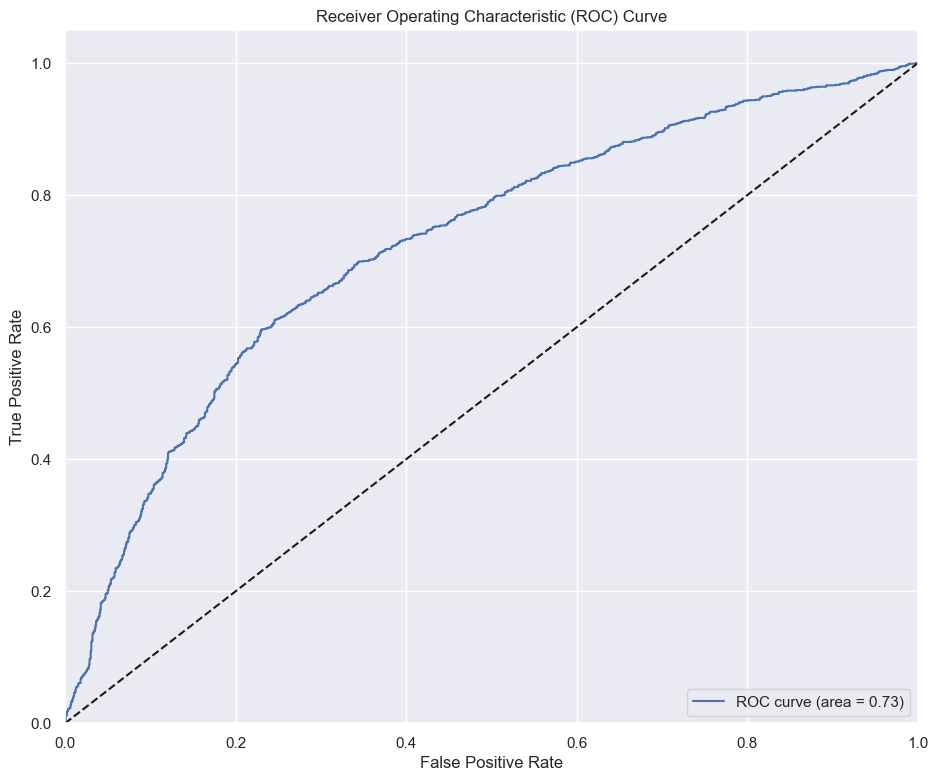

AUC Score: 0.7259150500824141


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6370106761565836, 0.6441281138790036, 0.6654804270462633, 0.6298932384341637, 0.6476868327402135, 0.6405693950177936, 0.6619217081850534, 0.6725978647686833, 0.6725978647686833, 0.6392857142857142]
Mean accuracy: 0.6511171835282156
95% confidence interval: (0.639914535123814, 0.6623198319326171)


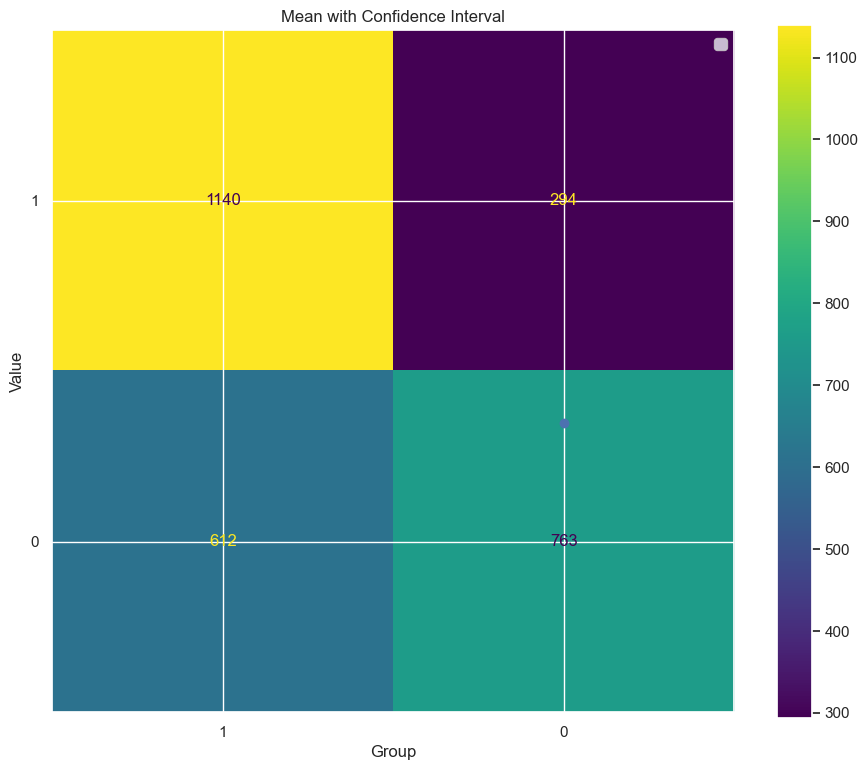

In [21]:
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.SVM(df)
mean_accuracy_svm, confidence_interval_svm = ML_algorithms.k_fold_cross_validation_dt(svm, df)

## Conclusion

### ROC Curve

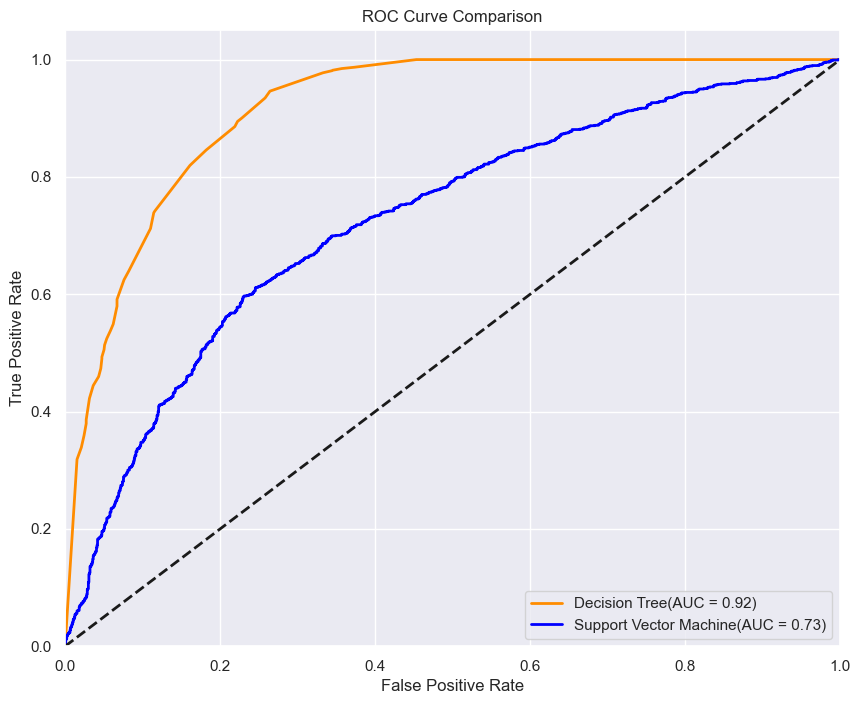

In [22]:
ML_algorithms.plot_roc_curve_conlusion(y_pred_prob_dt, y_test_dt, y_pred_prob_svm, y_test_svm)

### Confidence Interval - Decision Tree

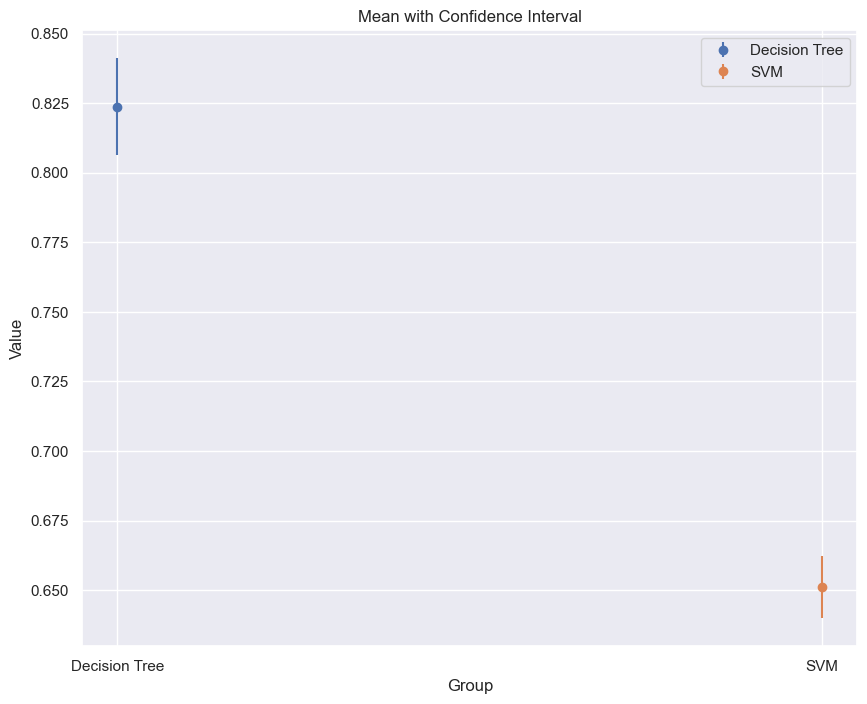

In [23]:
model_results = [
    ('Decision Tree', mean_accuracy_dt, confidence_interval_dt),
    ('SVM', mean_accuracy_svm, confidence_interval_svm)
]
ML_algorithms.plot_confidence_intervals(model_results)